In [1]:
# Preparatory assignment for the LISS Challenge 
# Formulating the problem
# What kind of problem is this? Classification or regression?
#         Definitely a classification problem
# What are the inputs (features) and what are the outcomes (target)?
#         Background data of the respondents (sociodemographics, sociopolitical attitudes, etc.)        
# How many classes are there in the target variable?
#         Allegedly two, having children in 2020-2022 vs not having children in 2020-2022

In [2]:
import pandas as pd 

In [3]:
# Reading in and exploring the data
# Reading the LISS features data
data = pd.read_csv('LISS_example_input_data.csv', encoding='cp1252', low_memory=False)

In [4]:
# Reading the LISS target data
outcome = pd.read_csv('LISS_example_groundtruth_data.csv')

In [5]:
# EXPLORING THE DATA
# How many features do we have?
data.shape

(9459, 29459)

In [6]:
# Let's check if they are both structured in the same way
data.head(10)

,nomem_encr,gebjaar,geslacht,nohouse_encr2007,nohouse_encr2008,nohouse_encr2009,nohouse_encr2010,nohouse_encr2011,nohouse_encr2012,nohouse_encr2013,...,cw19l600,cw19l601,cw19l602,cw19l603,cw19l604,cw19l605,cw19l606,cw19l607,cw19l608,cw19l609
0,800000.0,1980,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,800018.0,1985,Male,NaN,NaN,NaN,NaN,NaN,516668.0,516668.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800021.0,1979,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800033.0,1991,Male,583404.0,583404.0,583404.0,583404.0,583404.0,583404.0,583404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,800042.0,1975,Female,500277.0,500277.0,500277.0,500277.0,500277.0,500277.0,500277.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,800057.0,1975,Male,580532.0,580532.0,580532.0,580532.0,580532.0,580532.0,580532.0,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,800076.0,1985,Female,578048.0,578048.0,589065.0,589065.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,800085.0,1977,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,800103.0,1978,Female,NaN,NaN,557192.0,557192.0,557192.0,557192.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,800112.0,1990,Male,587908.0,587908.0,587908.0,587908.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
outcome.head(10)
# they indeed look structured in the same way
# The feature dataset contains a combination of numerical and categorical variables

,nomem_encr,new_child
0,800000.0,NaN
1,800018.0,NaN
2,800021.0,NaN
3,800033.0,NaN
4,800042.0,NaN
5,800057.0,0.0
6,800076.0,NaN
7,800085.0,NaN
8,800103.0,NaN
9,800112.0,NaN


In [8]:
# Let's have a look at the target variable descriptives 
outcome['new_child'].describe()
# Only 16.4 % of the samples are in the 1 class

count    902.000000
mean       0.165188
std        0.371557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: new_child, dtype: float64

In [9]:
# Selecting the data
selected_columns = ['burgstat2019', 'leeftijd2019', 'woonvorm2019', 'oplmet2019', 'aantalki2019']
features = data[selected_columns]

In [10]:
# Cleaning the data
# The null values in the target variable
y_isna = outcome['new_child'].isnull()

# The rows where any of the features is NaN
X_isna = features.isnull().any(axis=1)

# For both datasets drop rows where any of the features is NaN OR the outcome is NaN
features = features.drop(features[y_isna | X_isna].index)
outcome = outcome.drop(outcome[y_isna | X_isna].index)

In [11]:
# Let's have a check whether everything went as it should
features.shape

(504, 5)

In [12]:
# Preprocessing (recoding) the variables
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(features)
categorical_columns = categorical_columns_selector(features)

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [14]:
# Machine learning - Step 1: Split data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, outcome['new_child'], test_size=0.30, random_state=42)

In [26]:
X_train.shape

(352, 5)

In [27]:
X_test.shape

(152, 5)

In [28]:
y_train.shape

(352,)

In [29]:
y_test.shape

(152,)

In [30]:
# Machine learning - Step 2: training the model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['burgstat2019',
                                                   'woonvorm2019', 'oplmet2019',
                                                   'aantalki2019']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['leeftijd2019'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [31]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(model, X_train, y_train, cv=5)

In [32]:
cv_result

{'fit_time': array([0.01695514, 0.01495409, 0.01299644, 0.01392746, 0.01232505]),
 'score_time': array([0.00402021, 0.00499272, 0.00498939, 0.00402141, 0.0036304 ]),
 'test_score': array([0.85915493, 0.84507042, 0.85714286, 0.85714286, 0.85714286])}

In [33]:
cv_result["test_score"].mean(), cv_result["test_score"].std()

(0.8551307847082494, 0.005090185368480278)

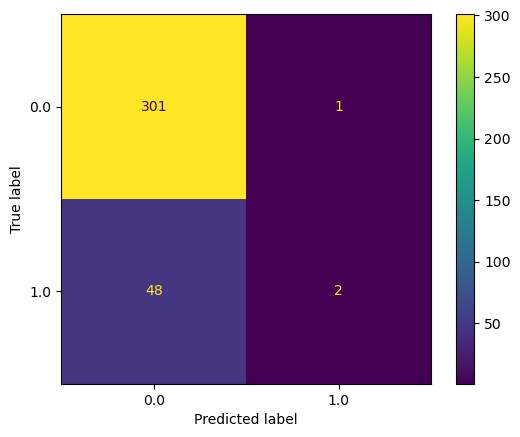

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
_ = model.fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)